# Fashion-MNIST Classification using Neural Network

In this notebook, we'll build a neural network to classify Fashion-MNIST images

In [3]:
#Importing main libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import OrderedDict

## Build the network

In [4]:
import pytorch_lightning as pl

""" Old code:
    def network():
    model = nn.Sequential(OrderedDict([('fc1', nn.Linear(784, 128)),
                                       ('relu1', nn.ReLU()),
                                       ('drop1', nn.Dropout(0.25)),                                       
                                       ('fc2', nn.Linear(128, 64)),
                                       ('relu2', nn.ReLU()),
                                       ('drop1', nn.Dropout(0.25)),                                       
                                       ('output', nn.Linear(64, 10)),
                                       ('logsoftmax', nn.LogSoftmax(dim=1))]))
    # Use GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # define the criterion and optimizer
    loss_fn = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    return model, loss_fn, optimizer, device"""  

class Network(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(OrderedDict([('fc1', nn.Linear(784, 128)),
                                                ('relu1', nn.ReLU()),
                                                ('drop1', nn.Dropout(0.25)),
                                                ('fc2', nn.Linear(128, 64)),
                                                ('relu2', nn.ReLU()),
                                                ('drop1', nn.Dropout(0.25)),
                                                ('output', nn.Linear(64, 10)),
                                                ('logsoftmax', nn.LogSoftmax(dim=1))]))
        self.loss_fn = nn.NLLLoss()
        
    def forward(self, x):
        x = self.network(x)
        return x
    
        """ Old code:
            images, labels = images.to(device), labels.to(device)
            # flatten the images to batch_size x 784
            images = images.view(images.shape[0], -1)
            # forward pass
            outputs = model(images)
            # backpropogation
            train_batch_loss = loss_fn(outputs, labels)
            """
    def training_step(self, batch, batch_idx):
        images, labels = batch
        images = images.view(images.shape[0], -1)
        out = self.forward(images)
        loss = self.loss_fn(out, labels)
        return loss
    
    def validation_step(self, batch, batch_idx):
        images, labels = batch
        images = images.view(images.shape[0], -1)
        out = self.forward(images)
        loss = self.loss_fn(out, labels)
        return loss
    
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.003)
        return optimizer
    
        """ Old code:
        # Download training and testing data
        transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
        train_ds = datasets.FashionMNIST('F_MNIST_data', download=False, train=True, transform=transform)
        test_ds = datasets.FashionMNIST('F_MNIST_data', download=False, train=False, transform=transform)

        # split train set into training (80%) and validation set (20%)
        train_num = len(train_ds)
        indices = list(range(train_num))
        np.random.shuffle(indices)
        split = int(np.floor(0.2 * train_num))
        val_idx, train_idx = indices[:split], indices[split:]
        len(val_idx), len(train_idx)

        # prepare dataloaders
        train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
        train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=train_sampler)
        val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_idx)
        val_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=val_sampler)
        test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True) """
    
    def train_dataloader(self):
        transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
        train_ds = datasets.FashionMNIST('F_MNIST_data', download=False, train=True, transform=transform)
        train_num = len(train_ds)
        indices = list(range(train_num))
        np.random.shuffle(indices)
        split = int(np.floor(0.2 * train_num))
        val_idx, train_idx = indices[:split], indices[split:]
        train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
        train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=train_sampler)
        return train_dl
    
    def val_dataloader(self):
        transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
        train_ds = datasets.FashionMNIST('F_MNIST_data', download=False, train=True, transform=transform)
        train_num = len(train_ds)
        indices = list(range(train_num))
        np.random.shuffle(indices)
        split = int(np.floor(0.2 * train_num))
        val_idx, train_idx = indices[:split], indices[split:]
        val_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_idx)
        val_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, sampler=val_sampler)
        return val_dl
    
    def test_dataloader(self):
        transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
        test_ds = datasets.FashionMNIST('F_MNIST_data', download=False, train=False, transform=transform)
        test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)
        return test_dl


In [5]:
#model, loss_fn, optimizer, device = network()

model = Network()
print(model)

Network(
  (network): Sequential(
    (fc1): Linear(in_features=784, out_features=128, bias=True)
    (relu1): ReLU()
    (drop1): Dropout(p=0.25, inplace=False)
    (fc2): Linear(in_features=128, out_features=64, bias=True)
    (relu2): ReLU()
    (output): Linear(in_features=64, out_features=10, bias=True)
    (logsoftmax): LogSoftmax(dim=1)
  )
  (loss_fn): NLLLoss()
)


## Train the network

In [8]:
#Creating trainer
trainer = pl.Trainer(max_epochs=25)

#Training
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytorch_lightning\loops\utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 109 K 
1 | loss_fn | NLLLoss    | 0     
---------------------------------------
109 K     Trainable params
0         Non-trainable params
109 K     Total params
0.438     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


C:\Users\mosta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 4: 100%|██████████| 750/750 [00:25<00:00, 28.90it/s, v_num=1]

RuntimeError: bad allocation

In [8]:
def train_validate(model, loss_fn, optimizer, trainloader, testloader, device, n_epochs=25):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        # Set mode to training - Dropouts will be used here
        model.train()
        train_epoch_loss = 0
        for images, labels in trainloader:

            """
            images, labels = images.to(device), labels.to(device)
            # flatten the images to batch_size x 784
            images = images.view(images.shape[0], -1)
            # forward pass
            outputs = model(images)
            # backpropogation
            train_batch_loss = loss_fn(outputs, labels)
            """

            optimizer.zero_grad()
            train_batch_loss.backward()
            # Weight updates
            optimizer.step()
            train_epoch_loss += train_batch_loss.item()
        else:
            # One epoch of training complete
            # calculate average training epoch loss
            train_epoch_loss = train_epoch_loss/len(trainloader)

            # Now Validate on testset
            with torch.no_grad():
                test_epoch_acc = 0
                test_epoch_loss = 0
                # Set mode to eval - Dropouts will NOT be used here
                model.eval()
                for images, labels in testloader:
                    images, labels = images.to(device), labels.to(device)                    
                    # flatten images to batch_size x 784
                    images = images.view(images.shape[0], -1)
                    # make predictions 
                    test_outputs = model(images)
                    # calculate test loss
                    test_batch_loss = loss_fn(test_outputs, labels)
                    test_epoch_loss += test_batch_loss
                    
                    # get probabilities, extract the class associated with highest probability
                    proba = torch.exp(test_outputs)
                    _, pred_labels = proba.topk(1, dim=1)
                    
                    # compare actual labels and predicted labels
                    result = pred_labels == labels.view(pred_labels.shape)
                    batch_acc = torch.mean(result.type(torch.FloatTensor))
                    test_epoch_acc += batch_acc.item()
                else:
                    # One epoch of training and validation done
                    # calculate average testing epoch loss
                    test_epoch_loss = test_epoch_loss/len(testloader)
                    # calculate accuracy as correct_pred/total_samples
                    test_epoch_acc = test_epoch_acc/len(testloader)
                    # save epoch losses for plotting
                    train_losses.append(train_epoch_loss)
                    test_losses.append(test_epoch_loss)
                    # print stats for this epoch
                    print(f'Epoch: {epoch} -> train_loss: {train_epoch_loss:.19f}, val_loss: {test_epoch_loss:.19f}, ',
                          f'val_acc: {test_epoch_acc*100:.2f}%')
    # Finally plot losses
    plt.plot(train_losses, label='train-loss')
    plt.plot(test_losses, label='val-loss')
    plt.legend()
    plt.show()

Epoch: 0 -> train_loss: 0.5789495082100232226, val_loss: 0.4314785301685333252,  val_acc: 84.25%
Epoch: 1 -> train_loss: 0.4618516213297844120, val_loss: 0.4155995845794677734,  val_acc: 84.93%
Epoch: 2 -> train_loss: 0.4279627588391303750, val_loss: 0.3943289518356323242,  val_acc: 85.77%
Epoch: 3 -> train_loss: 0.4079944960872332049, val_loss: 0.3557489812374114990,  val_acc: 87.35%
Epoch: 4 -> train_loss: 0.3956802259286244516, val_loss: 0.3641712069511413574,  val_acc: 86.84%
Epoch: 5 -> train_loss: 0.3791722096800804187, val_loss: 0.3616520166397094727,  val_acc: 87.08%
Epoch: 6 -> train_loss: 0.3724695665637652309, val_loss: 0.3773570656776428223,  val_acc: 86.35%
Epoch: 7 -> train_loss: 0.3651738567749659437, val_loss: 0.3795778453350067139,  val_acc: 86.20%
Epoch: 8 -> train_loss: 0.3566868165532747770, val_loss: 0.3470855951309204102,  val_acc: 87.72%
Epoch: 9 -> train_loss: 0.3564704367617765879, val_loss: 0.3415614962577819824,  val_acc: 87.66%
Epoch: 10 -> train_loss: 0.345

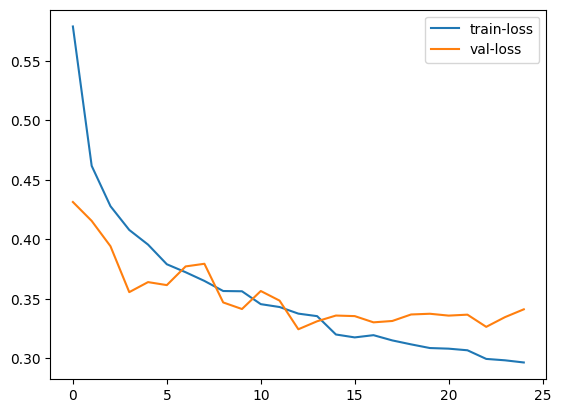

In [9]:
# Train and validate
train_validate(model, loss_fn, optimizer, train_dl, val_dl, device)

### Predict a single image

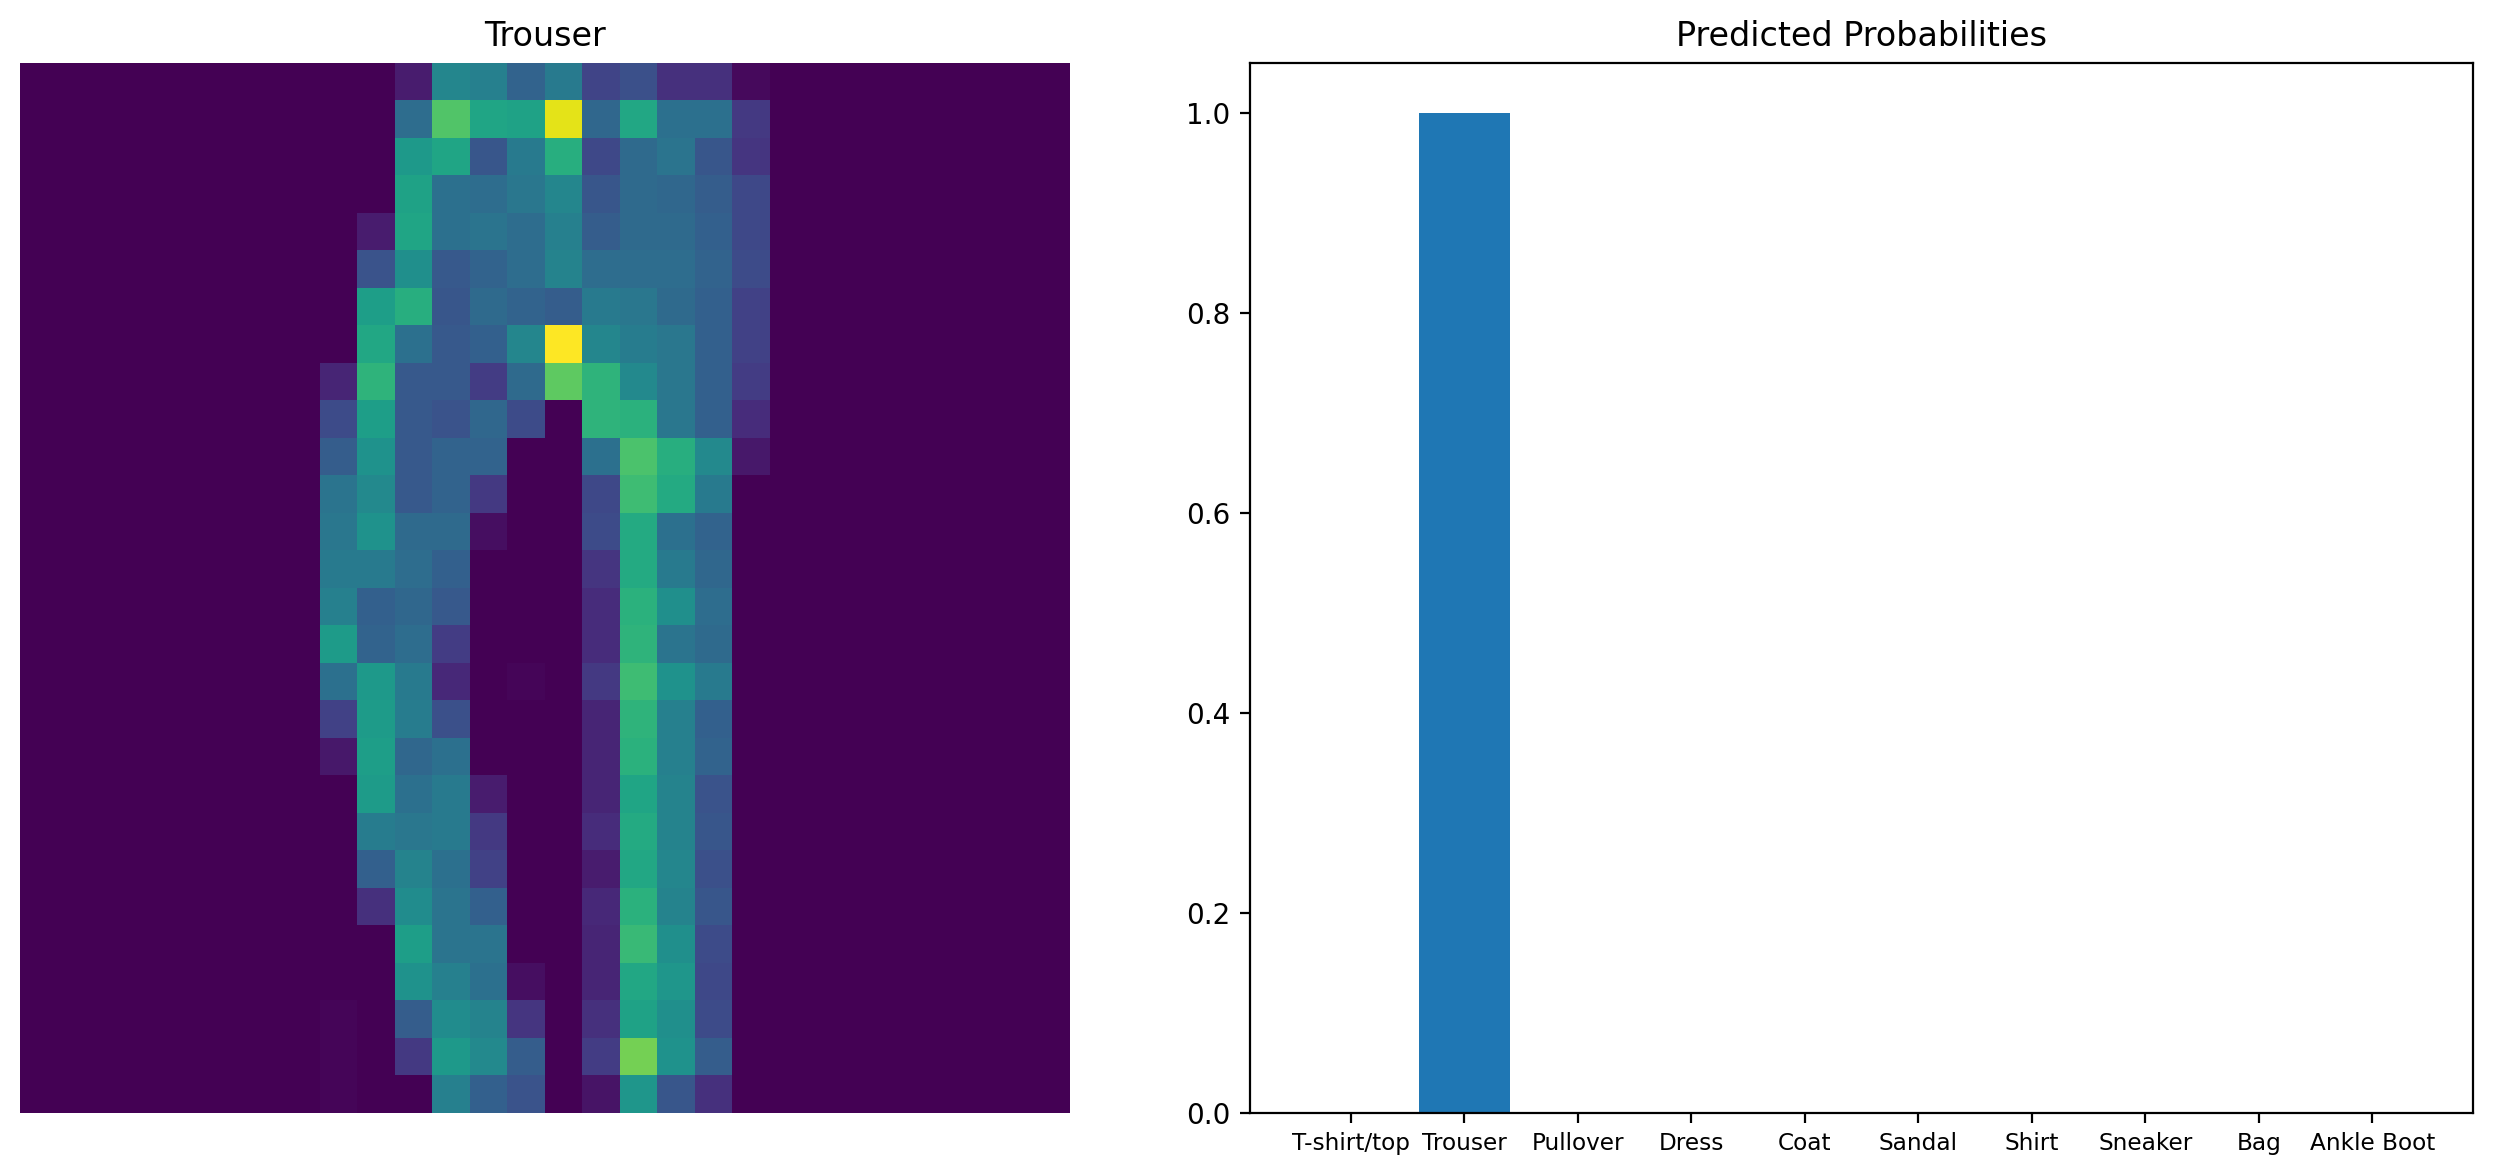

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out the network!
dataiter = iter(test_dl)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)
index = 49
img, label = images[index], labels[index]
# Convert 2D image to 1D vector
img = img.view(img.shape[0], -1)

# Calculate the class probabilities (softmax) for img
proba = torch.exp(model(img))

# Plot the image and probabilities
desc = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
fig, (ax1, ax2) =  plt.subplots(figsize=(13, 6), nrows=1, ncols=2)
ax1.axis('off')
ax1.imshow(images[index].cpu().numpy().squeeze())
ax1.set_title(desc[label.item()])
ax2.bar(range(10), proba.detach().cpu().numpy().squeeze())
ax2.set_xticks(range(10))
ax2.set_xticklabels(desc, size='small')
ax2.set_title('Predicted Probabilities')
plt.tight_layout()

## Validate on test set

In [11]:
# Validate
with torch.no_grad():
    batch_acc = []
    model.eval()
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        # flatten images to batch_size x 784
        images = images.view(images.shape[0], -1)
        # make predictions and get probabilities
        proba = torch.exp(model(images))
        # extract the class associted with highest probability
        _, pred_labels = proba.topk(1, dim=1)
        # compare actual labels and predicted labels
        result = pred_labels == labels.view(pred_labels.shape)
        acc = torch.mean(result.type(torch.FloatTensor))
        batch_acc.append(acc.item())
    else:
        print(f'Test Accuracy: {torch.mean(torch.tensor(batch_acc))*100:.2f}%')

Test Accuracy: 86.93%


## More powerful model

In [12]:
# Redefine network with dropout layers in between
def network():
    model = nn.Sequential(OrderedDict([('fc1', nn.Linear(784, 392)),
                                       ('relu1', nn.ReLU()),
                                       ('drop1', nn.Dropout(0.25)),
                                       ('fc12', nn.Linear(392, 196)),
                                       ('relu2', nn.ReLU()),
                                       ('drop2', nn.Dropout(0.25)),
                                       ('fc3', nn.Linear(196, 98)),
                                       ('relu3', nn.ReLU()),
                                       ('drop3', nn.Dropout(0.25)),                                       
                                       ('fc4', nn.Linear(98, 49)),
                                       ('relu4', nn.ReLU()),
                                       ('output', nn.Linear(49, 10)),
                                       ('logsoftmax', nn.LogSoftmax(dim=1))]))
    
    # Use GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # define the criterion and optimizer
    loss_fn = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0007)

    return model, loss_fn, optimizer, device       

In [13]:
model, loss_fn, optimizer, device = network()
model

Sequential(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.25, inplace=False)
  (fc12): Linear(in_features=392, out_features=196, bias=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=196, out_features=98, bias=True)
  (relu3): ReLU()
  (drop3): Dropout(p=0.25, inplace=False)
  (fc4): Linear(in_features=98, out_features=49, bias=True)
  (relu4): ReLU()
  (output): Linear(in_features=49, out_features=10, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

Epoch: 0 -> train_loss: 0.6855045186281204517, val_loss: 0.4465020298957824707,  val_acc: 84.07%
Epoch: 1 -> train_loss: 0.4642426335414250871, val_loss: 0.4065601229667663574,  val_acc: 85.46%
Epoch: 2 -> train_loss: 0.4183805910150210083, val_loss: 0.3935156464576721191,  val_acc: 85.79%
Epoch: 3 -> train_loss: 0.3921241991321245957, val_loss: 0.3722155690193176270,  val_acc: 86.65%
Epoch: 4 -> train_loss: 0.3697275487581888620, val_loss: 0.3648492991924285889,  val_acc: 86.98%
Epoch: 5 -> train_loss: 0.3555079794029394891, val_loss: 0.3529390692710876465,  val_acc: 86.83%
Epoch: 6 -> train_loss: 0.3443926275670528558, val_loss: 0.3248184919357299805,  val_acc: 88.38%
Epoch: 7 -> train_loss: 0.3269262994229793495, val_loss: 0.3249777853488922119,  val_acc: 88.48%
Epoch: 8 -> train_loss: 0.3205269113381703505, val_loss: 0.3181797266006469727,  val_acc: 88.50%
Epoch: 9 -> train_loss: 0.3130609797338644862, val_loss: 0.3347418010234832764,  val_acc: 87.97%
Epoch: 10 -> train_loss: 0.301

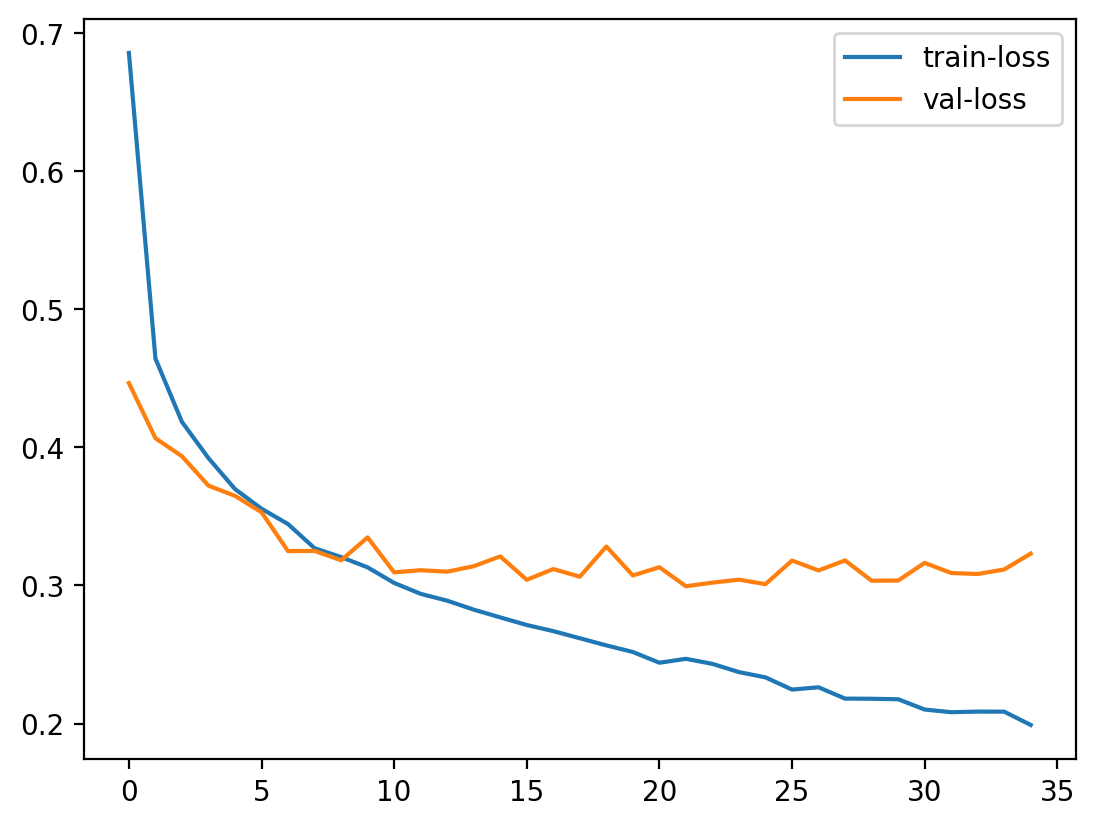

In [14]:
# Train and validate again with new architecture
train_validate(model, loss_fn, optimizer, train_dl, val_dl, device, n_epochs=35)

## Validate on test set

In [15]:
# Validate
with torch.no_grad():
    model.eval()
    batch_acc = []
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        # flatten images to batch_size x 784
        images = images.view(images.shape[0], -1)
        # make predictions and get probabilities
        proba = torch.exp(model(images))
        # extract the class associted with highest probability
        _, pred_labels = proba.topk(1, dim=1)
        # compare actual labels and predicted labels
        result = pred_labels == labels.view(pred_labels.shape)
        acc = torch.mean(result.type(torch.FloatTensor))
        batch_acc.append(acc.item())
    else:
        print(f'Accuracy: {torch.mean(torch.tensor(batch_acc))*100:.2f}%')

Accuracy: 88.65%
